In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import pylab
from datetime import datetime

#Organizing Dataset

df = pd.read_csv('payems.csv', delimiter =",", header = 5)

df["date"] = df["date"].apply(lambda x: datetime.strptime(str(x),"%m/%d/%y"))

df = df.set_index(df["date"])

df1 = df["2029-07-01":"2099-12-01"]

df2 = df["1920-01-01":"2017-12-01"]

df1['date'] = df1['date'].apply(lambda x: x - pd.DateOffset(years=100))

df1 = df1.set_index(df1["date"])

df = df1.append(df2)

/Users/bryanchia/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [54]:
#Locate Peak Dates

peak_time = [datetime(2007, 12, 1),datetime(2001, 3, 1),datetime(1990, 7, 1), datetime(1981, 7, 1), datetime(1980, 1, 1), datetime(1973, 11, 1), datetime(1969, 12, 1), datetime(1960, 4, 1), datetime(1957, 8, 1), datetime(1953, 7, 1), datetime(1948, 11, 1), datetime(1945, 2, 1), datetime(1937, 5, 1), datetime(1929, 8, 1)]

rec1 = df["2006-12-01":"2014-12-01"]
rec2 = df["2000-03-01":"2008-03-01"]
rec3 = df["1989-07-01":"1997-07-01"]
rec4 = df["1980-07-01":"1988-07-01"]
rec5 = df["1979-01-01":"1987-01-01"]
rec6 = df["1972-11-01":"1980-11-01"]
rec7 = df["1968-12-01":"1976-03-01"]
rec8 = df["1959-04-01":"1967-04-01"]
rec9 = df["1956-08-01":"1964-08-01"]
rec10 = df["1952-07-01":"1960-07-01"]
rec11 = df["1947-12-01":"1955-12-01"]
rec12 = df["1944-02-01":"1952-02-01"]
rec13 = df["1936-05-01":"1944-05-01"]
rec14 = df["1928-08-01":"1936-08-01"]

#Normalize

later_recs = [rec1, rec2, rec3, rec4, rec5, rec6, rec7, rec8, rec9, rec10, rec11, rec12]
early_recs = [rec13, rec14]
recs = [rec1, rec2, rec3, rec4, rec5, rec6, rec7, rec8, rec9, rec10, rec11, rec12, rec13, rec14]


for rec in recs:
    
    standard = rec['payems'][rec['peak'] == 1]
    rec["payems"] = rec["payems"].apply(lambda x: x / standard)
    
#Append columns in early recs 

rec14['count'] = 12

rec14['count'][rec14['peak']==1] = 5

def duplicate_rows(df, countcol):
    for _, row in df.iterrows():
        for i in range(int(row[countcol])-1):
            # Append this row at the end of the DataFrame
            df = df.append(row)

    # Remove countcol (could do a drop too to do that...)
    notcountcols = [x for x in df.columns if x != countcol]
    df = df[notcountcols]
    # optional: sort it by index
    df.sort_index(inplace=True)
    return df

rec14 = duplicate_rows(rec14, 'count')
rec14 = rec14.reset_index(drop=True)
rec14.index = np.arange(9, len(rec14) + 9)

#Do the same for the second earliest recession

rec13['count'] = 1
rec13['count'][rec13['yearonly']==1] = 12 
rec13 = duplicate_rows(rec13, 'count')
rec13 = rec13.reset_index(drop=True)
rec13.drop(rec13.index[[0,1,2,3]],inplace=True)
rec13 = rec13.reset_index(drop=True)
rec13.index = np.arange(1, len(rec13) + 1)

#Change indices

rec1 = rec1.reset_index(drop=True)
rec1.index = np.arange(1, len(rec1) + 1)

rec2 = rec2.reset_index(drop=True)
rec2.index = np.arange(1, len(rec2) + 1)

rec3 = rec3.reset_index(drop=True)
rec3.index = np.arange(1, len(rec3) + 1)

rec4 = rec1.reset_index(drop=True)
rec4.index = np.arange(1, len(rec4) + 1)

rec5 = rec5.reset_index(drop=True)
rec5.index = np.arange(1, len(rec5) + 1)

rec6 = rec1.reset_index(drop=True)
rec6.index = np.arange(1, len(rec6) + 1)

rec7 = rec1.reset_index(drop=True)
rec7.index = np.arange(1, len(rec7) + 1)

rec8 = rec8.reset_index(drop=True)
rec8.index = np.arange(1, len(rec8) + 1)

rec9 = rec9.reset_index(drop=True)
rec9.index = np.arange(1, len(rec9) + 1)

rec10 = rec1.reset_index(drop=True)
rec10.index = np.arange(1, len(rec10) + 1)

rec11 = rec11.reset_index(drop=True)
rec11.index = np.arange(1, len(rec11) + 1)

rec12 = rec12.reset_index(drop=True)
rec12.index = np.arange(1, len(rec12) + 1)


/Users/bryanchia/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/bryanchia/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/bryanchia/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Use

,date,payems,peak,yearonly
1,1944-02-01,1.015273,0,0
2,1944-03-01,1.009259,0,0
3,1944-04-01,1.003794,0,0
4,1944-05-01,1.001933,0,0
5,1944-06-01,1.001026,0,0
6,1944-07-01,1.000024,0,0
7,1944-08-01,0.998711,0,0
8,1944-09-01,0.994464,0,0
9,1944-10-01,0.995347,0,0
10,1944-11-01,0.995418,0,0


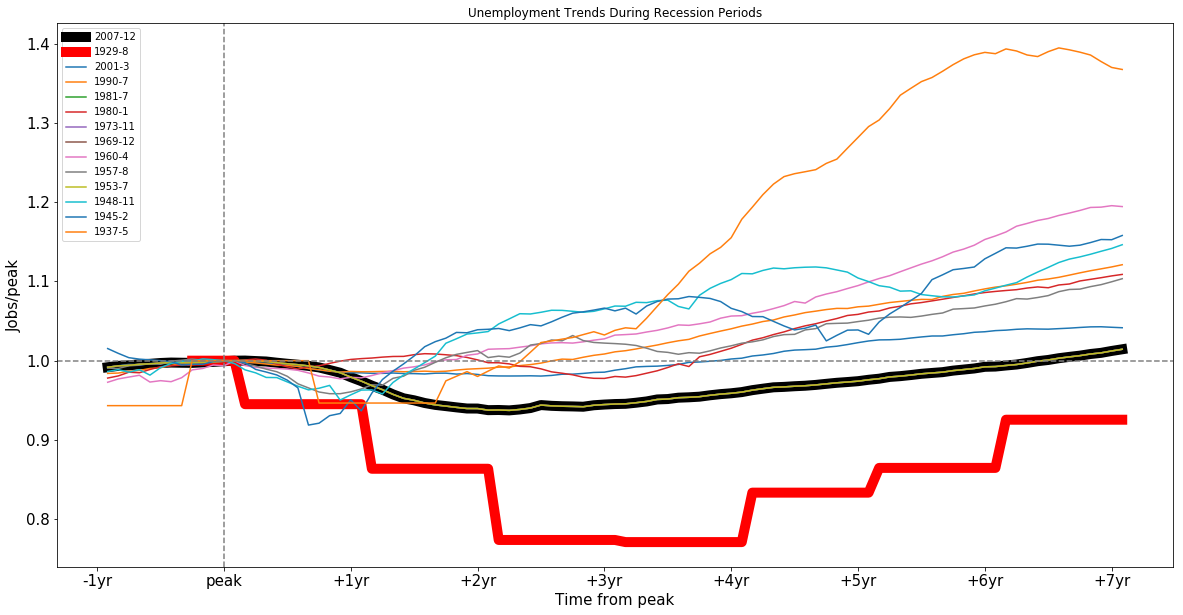

In [85]:
#Plot graphs

recs_choice = [rec2, rec3, rec4, rec5, rec6, rec7, rec8, rec9, rec10, rec11, rec12, rec13]

pylab.rcParams['figure.figsize'] = (20, 10)

peak_time = [datetime(2007, 12, 1),datetime(2001, 3, 1),datetime(1990, 7, 1), datetime(1981, 7, 1), datetime(1980, 1, 1), datetime(1973, 11, 1), datetime(1969, 12, 1), datetime(1960, 4, 1), datetime(1957, 8, 1), datetime(1953, 7, 1), datetime(1948, 11, 1), datetime(1945, 2, 1), datetime(1937, 5, 1), datetime(1929, 8, 1)]

peak_time_str = [ "2001-3","1990-7", "1981-7", "1980-1", "1973-11", "1969-12", "1960-4", "1957-8", "1953-7", "1948-11", "1945-2", "1937-5"]

plt.plot(rec1.index, rec1['payems'], color = 'k', lw = 10, label = "2007-12" )
plt.plot(rec14.index, rec14['payems'], color = 'r', lw = 10, label = "1929-8")

i = 0
for rec in recs_choice:
    plt.plot(rec.index, rec['payems'], label = peak_time_str[i] )
    i +=1

plt.axhline(1, linestyle='--', color='grey') # horizontal lines
plt.axvline(12, linestyle='--', color='grey')
labels = ['-1yr', 'peak', '+1yr', '+2yr','+3yr', '+4yr', '+5yr', '+6yr', '+7yr']
positions = np.arange(0, 100, 12)
plt.xticks(positions, labels, fontsize = 15)
plt.yticks(fontsize = 15)
plt.ylabel("Jobs/peak", fontsize = 15)
plt.xlabel("Time from peak", fontsize = 15)
plt.title("Unemployment Trends During Recession Periods")
plt.legend()
plt.show()

( j ) It seems like there were a couple of recessions that were worse at the start than the Great Recession. They include the 1937, 1945, 1948, 1957 and 1960 recessions. However, none were as prolonged as the Great Recession in terms of their impacts after the first year. In most years, the employment rate increased after a year but it kept dropping for 2 years in the Great Recession. 

( k ) No, it seems that in terms of unemployment, the Great Drepression was a lot worse than the Great Recession over the entire period of time. 